In [1]:

import csv
import pandas as pd
import emoji
import math
import advertools as adv
import numpy as np
from numpy import array
from numpy.linalg import norm
import os
import glob
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity


In [2]:
df=pd.read_csv('top31.csv')

In [3]:
df.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,110,111,112,113,114,115,116,117,118,119
0,France,0.065608,0.048864,0.111636,0.030531,0.097068,0.148114,0.570595,0.059741,0.047456,...,0.002568,0.004011,0.012367,0.025772,0.002881,0.005669,0.003582,0.004307,0.001004,0.070265
1,Germany,0.063282,0.072312,0.171659,0.060696,0.118366,0.183265,0.572640,0.062853,0.054200,...,0.002043,0.002496,0.006643,0.017168,0.001256,0.003085,0.004499,0.003942,0.000402,0.170945
2,Iceland,0.052212,0.074689,0.111235,0.072275,0.162819,0.126243,0.623191,0.067389,0.104641,...,0.008143,0.011646,0.004396,0.036022,0.008143,0.004396,0.008143,0.000000,0.000000,0.126243
3,Iran,0.041811,0.108628,0.246263,0.046111,0.158072,0.091080,0.690462,0.046111,0.028261,...,0.001375,0.004763,0.007813,0.024274,0.001982,0.004763,0.004230,0.001375,0.000000,0.083189
4,Japan,0.254503,0.139997,0.190330,0.300748,0.285680,0.170337,0.262163,0.052257,0.026516,...,0.026296,0.024161,0.013552,0.025535,0.005023,0.009286,0.010784,0.011012,0.001809,0.067854


In [4]:
countries=['France','Germany','Iceland','Iran','Japan','Mexico','Morocco','Nigeria','Panama','Poland','Peru','Portugal','Russia',
           'Serbia','Senegal','South_korea','Spain','Sweden','Switzerland','Tunisia','Uruguay','Argentina','Australia','Belgium',
          'Brazil','Colombia','Costa_rica','Croatia','Denmark','Egypt','England']

In [5]:
df['Unnamed: 0']=countries

In [6]:
df.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,110,111,112,113,114,115,116,117,118,119
0,France,0.065608,0.048864,0.111636,0.030531,0.097068,0.148114,0.570595,0.059741,0.047456,...,0.002568,0.004011,0.012367,0.025772,0.002881,0.005669,0.003582,0.004307,0.001004,0.070265
1,Germany,0.063282,0.072312,0.171659,0.060696,0.118366,0.183265,0.572640,0.062853,0.054200,...,0.002043,0.002496,0.006643,0.017168,0.001256,0.003085,0.004499,0.003942,0.000402,0.170945
2,Iceland,0.052212,0.074689,0.111235,0.072275,0.162819,0.126243,0.623191,0.067389,0.104641,...,0.008143,0.011646,0.004396,0.036022,0.008143,0.004396,0.008143,0.000000,0.000000,0.126243
3,Iran,0.041811,0.108628,0.246263,0.046111,0.158072,0.091080,0.690462,0.046111,0.028261,...,0.001375,0.004763,0.007813,0.024274,0.001982,0.004763,0.004230,0.001375,0.000000,0.083189
4,Japan,0.254503,0.139997,0.190330,0.300748,0.285680,0.170337,0.262163,0.052257,0.026516,...,0.026296,0.024161,0.013552,0.025535,0.005023,0.009286,0.010784,0.011012,0.001809,0.067854


In [8]:
vectors=df[df['Unnamed: 0'].isin(['Australia','Nigeria','England','Denmark'])].iloc[:,1:121].values

In [9]:
l1=list(vectors[0])
l2=list(vectors[1])
l3=list(vectors[2])
l4=list(vectors[3])
array1 = np.array(l1)
array2 = np.array(l2)
array3= np.array(l3)
array4=np.array(l4)
array1 = array1.reshape(1, -1)
array2 = array2.reshape(1, -1)
array3 = array3.reshape(1,-1)
array4 = array4.reshape(1,-1)
cos_sim_matrix = cosine_similarity(np.concatenate(( array2, array1,array4, array3), axis=0))

# Convert the cosine similarity matrix into a pandas DataFrame
df_cos_sim_matrix = pd.DataFrame(cos_sim_matrix, columns=['Australia', 'Nigeria', 'England', 'Denmark'], index=['Australia', 'Nigeria', 'England', 'Denmark'])

# Use seaborn to create a heatmap of the cosine similarity matrix
sns.heatmap(df_cos_sim_matrix, annot=True,cmap='Blues')
plt.savefig('Emoji_sim-24.png')


In [8]:
country_dic={}
for i,idx in df.iterrows():
    #print(idx[1:32].values)
    country_dic[idx[0]]=idx[1:122].values

In [9]:
cosine_matrix=[]
for i in countries:
    x=[]
    for j in countries:
        dot_product = np.dot(country_dic[i],country_dic[j] )
        norm_a = np.linalg.norm(country_dic[i])
        norm_b = np.linalg.norm(country_dic[j])
        cosine_similarity = dot_product / (norm_a * norm_b)
        x.append(cosine_similarity)
    cosine_matrix.append(x)
        

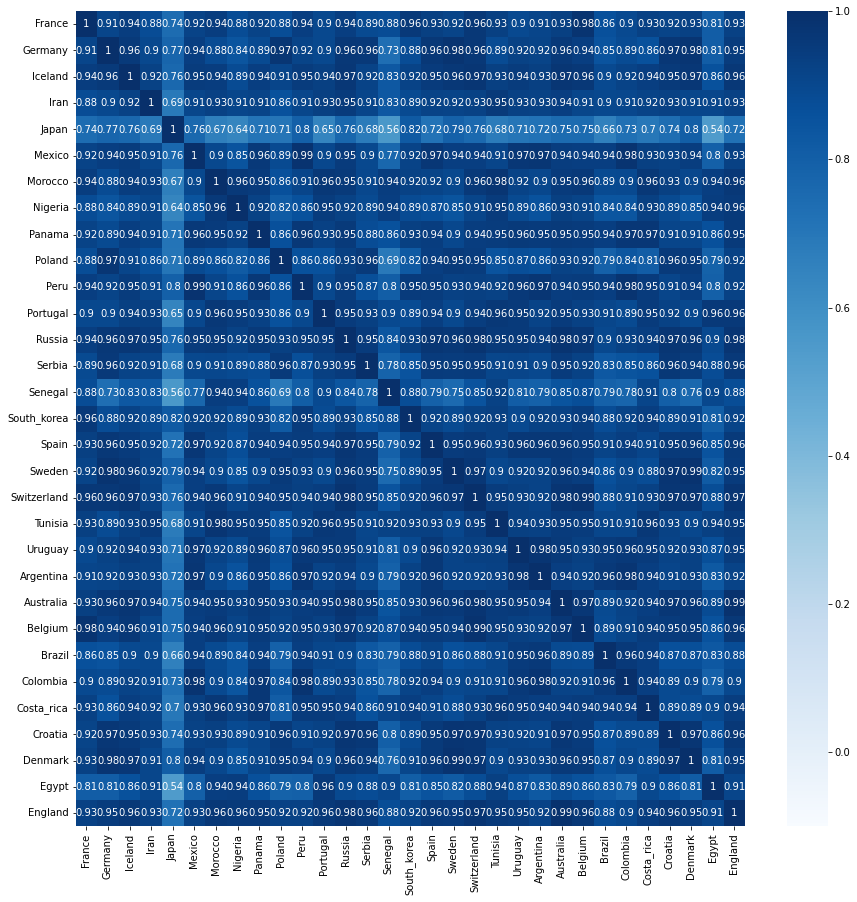

In [11]:
fig, ax = plt.subplots(figsize=(15,15))
ax = sns.heatmap(cosine_matrix, vmin=1, vmax=0,cmap='Blues',annot=True,xticklabels=country_dic.keys(),yticklabels=country_dic.keys())

plt.show()

In [20]:
english_countries=['Australia','England','Denmark','Sweden','Nigeria']
multiple_lang=['Iran','Switzerland','Belgium','Denmark']
non_english=['France','Germany','Iceland','Iran','Japan','Mexico','Morocco','Panama','Poland','Peru','Portugal','Russia',
             'Serbia','Senegal','South_korea','Spain','Tunisia','Uruguay','Argentina','Brazil','Colombia','Costa_rica','Croatia',
            'Egypt']
Europe_countries=['Germany','Poland','Sweden','Belgium','Denmark']
spanish=['Mexico','Panama','Peru','Spain','Uruguay','Argentina','Colombia','Costa_rica']
south_america=['Mexico','Peru','Uruguay','Argentina','Brazil','Colombia']

In [14]:
def heatmap(country,country_dic,title1):    
    n1=[]
    #print(len(country))
    for i in country_dic.keys():
        if i in country:
            m1=[]
            for j in country_dic.keys():
                if j in country:
                    if i!=j:
                        m1.append(np.linalg.norm(np.array(country_dic[i]) - np.array(country_dic[j])))
                    else:
                        m1.append(0)
            #print(i)
            n1.append(m1)
    #print(len(n1))
    fig, ax = plt.subplots(figsize=(10,10))
    ax = sns.heatmap(n1, vmin=1, vmax=0,cmap='Blues',annot=True,xticklabels=country,yticklabels=country)
    ax.set_title(title1)
    plt.show()

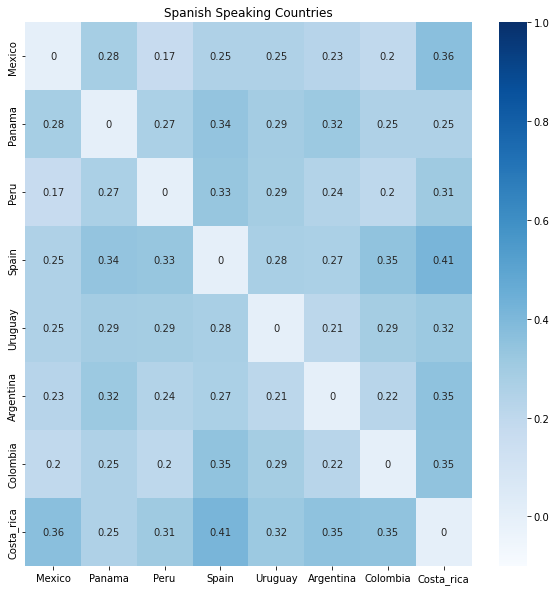

In [15]:
heatmap(spanish,country_dic,'Spanish Speaking Countries')

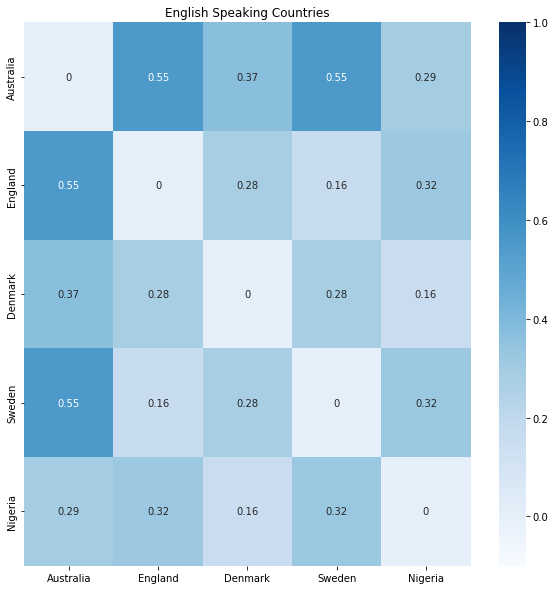

In [16]:
heatmap(english_countries,country_dic,'English Speaking Countries')

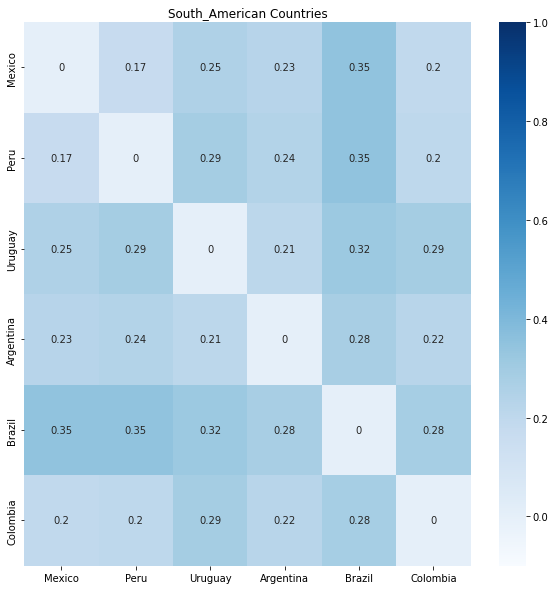

In [17]:
heatmap(south_america,country_dic,'South_American Countries')

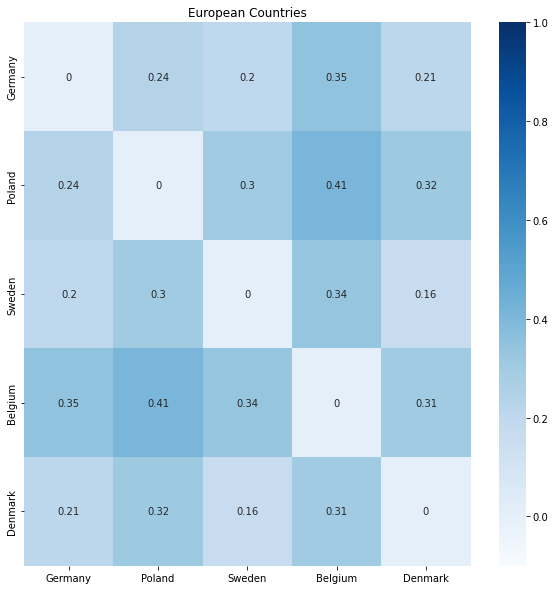

In [18]:
heatmap(Europe_countries,country_dic,'European Countries')

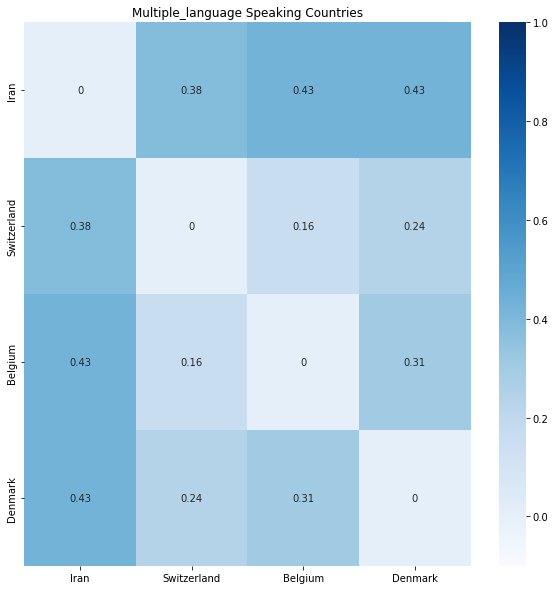

In [21]:
heatmap(multiple_lang,country_dic,'Multiple_language Speaking Countries')